## Davin Barthold
## King-Rook-King chess endgame classification

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('krkopt.data')

# rename columns
df.columns = ['WK_file', 'WK_rank','WR_file', 'WR_rank', 'BK_file', 'BK_rank', 'outcome']

# display first five rows
print("\nFirst five rows of dataset:")
print(df.head(5))


First five rows of dataset:
  WK_file  WK_rank WR_file  WR_rank BK_file  BK_rank outcome
0       a        1       c        1       c        2    draw
1       a        1       c        1       d        1    draw
2       a        1       c        1       d        2    draw
3       a        1       c        2       c        1    draw
4       a        1       c        2       c        3    draw


In [32]:
# missing values
print("\nMissing values by column:")
print(df.isna().sum())

# unique values
print(df['WK_file'].unique())
df['WK_file'] = df['WK_file'].astype(int)


Missing values by column:
WK_file    0
WK_rank    0
WR_file    0
WR_rank    0
BK_file    0
BK_rank    0
outcome    0
dtype: int64
[0 1 2 3]


Shape of your Data Set loaded: (28055, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 21
All Plots done
Time to run AutoViz = 2 seconds 

 ###########

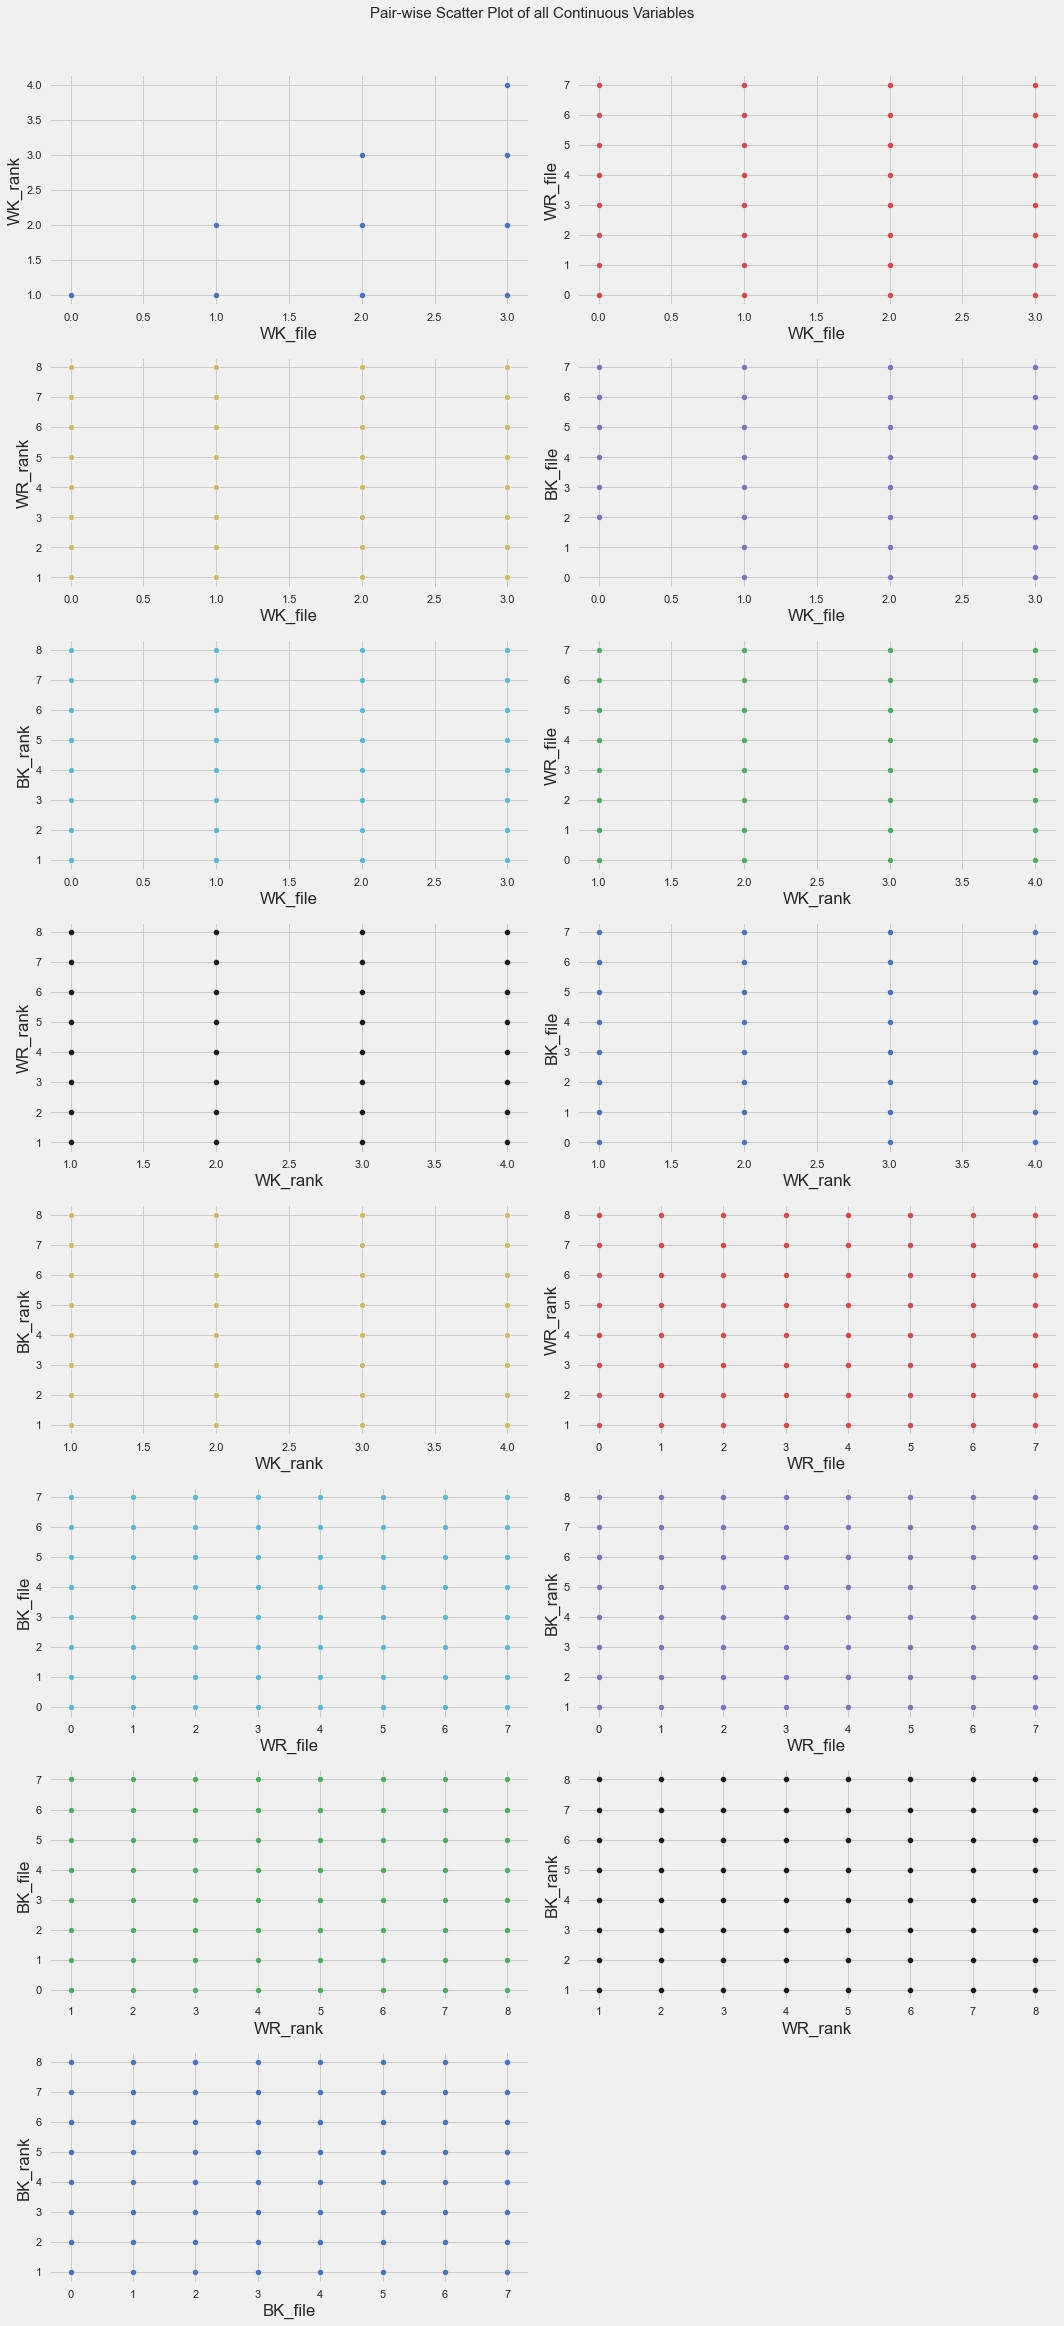

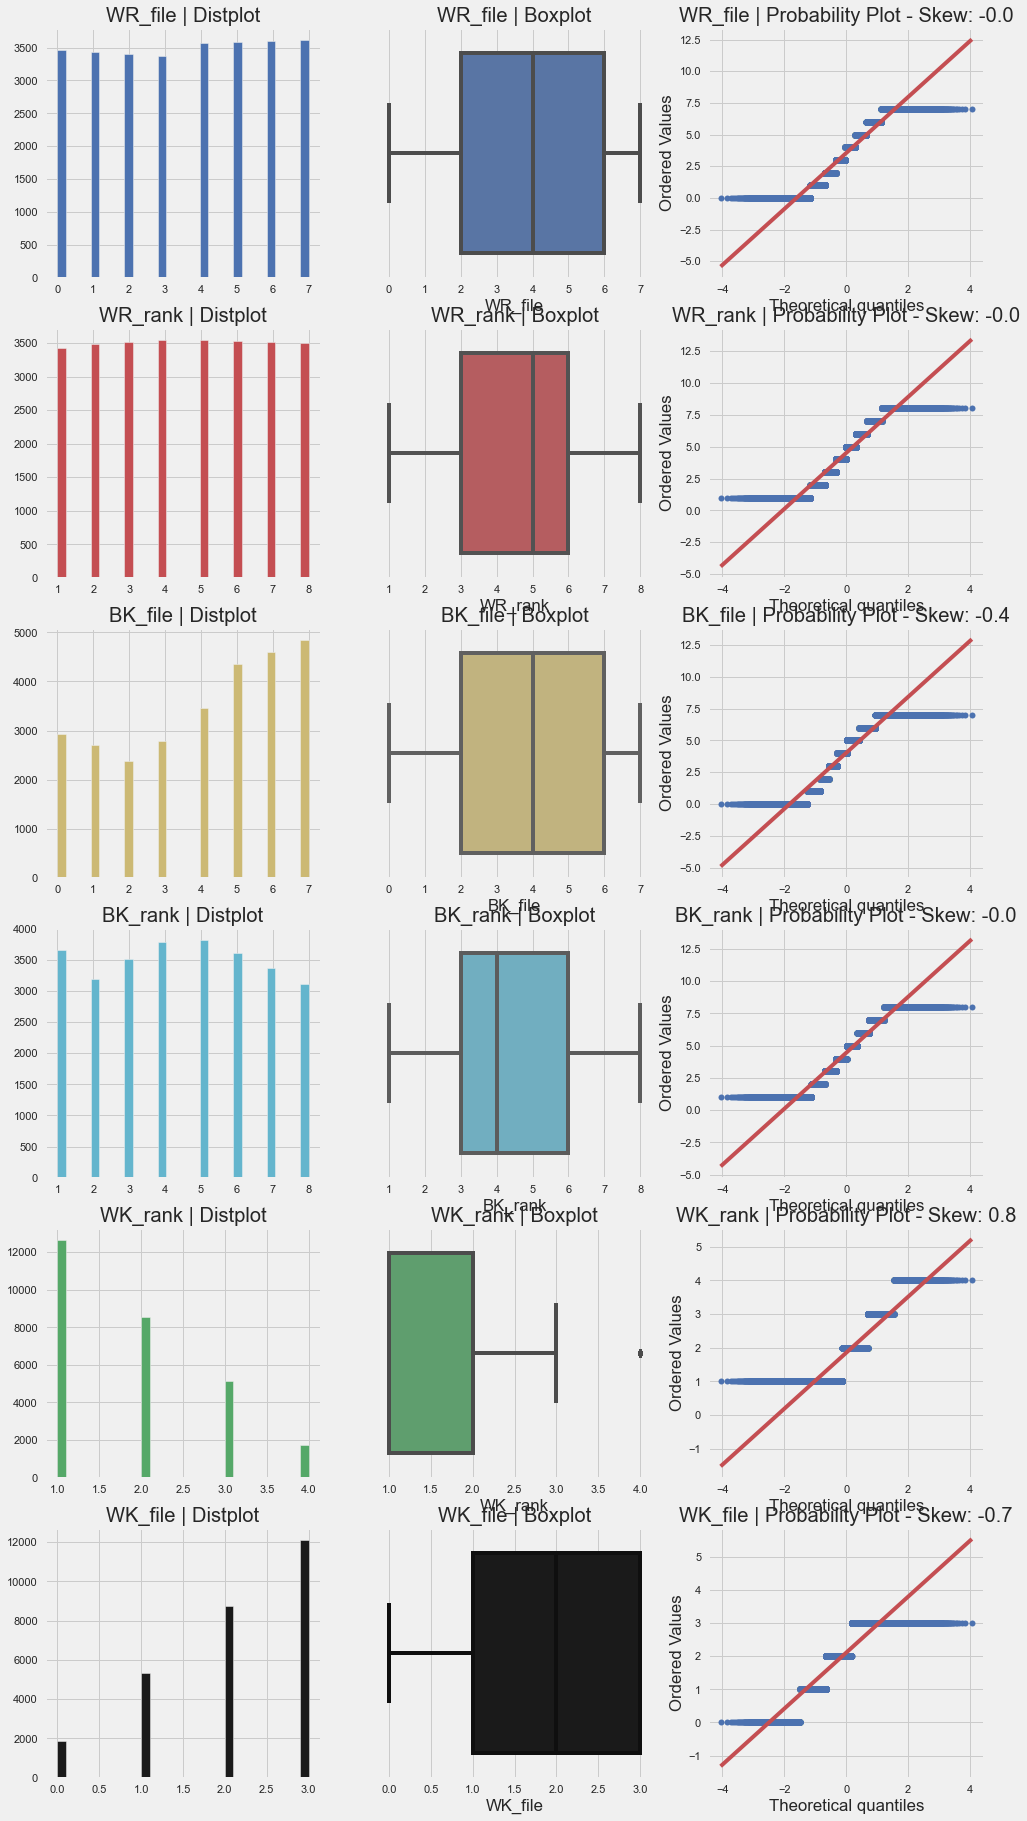

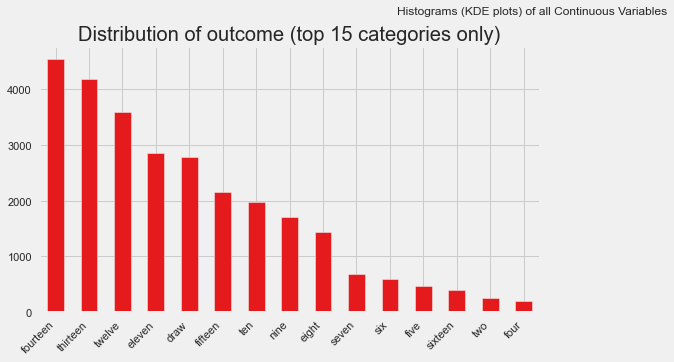

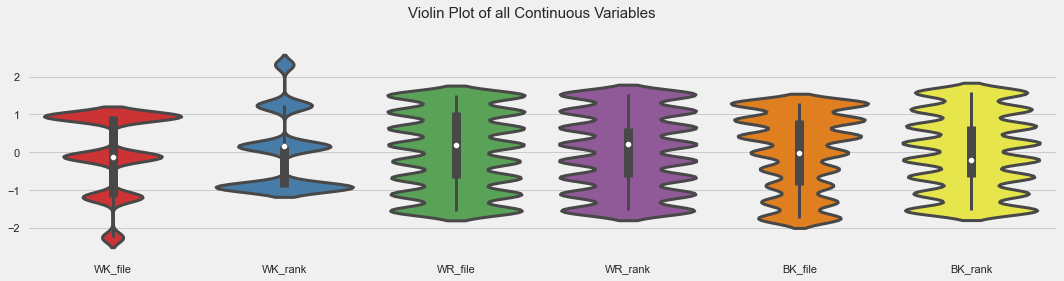

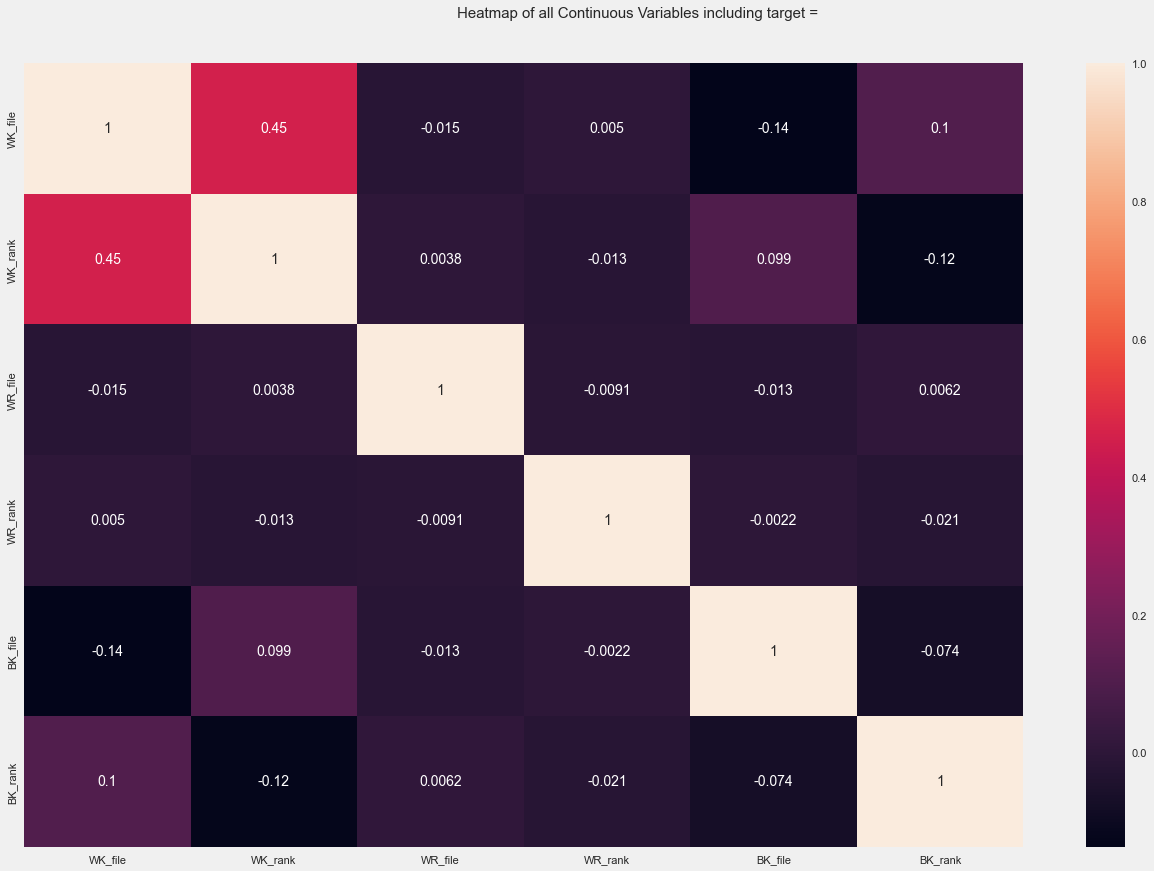

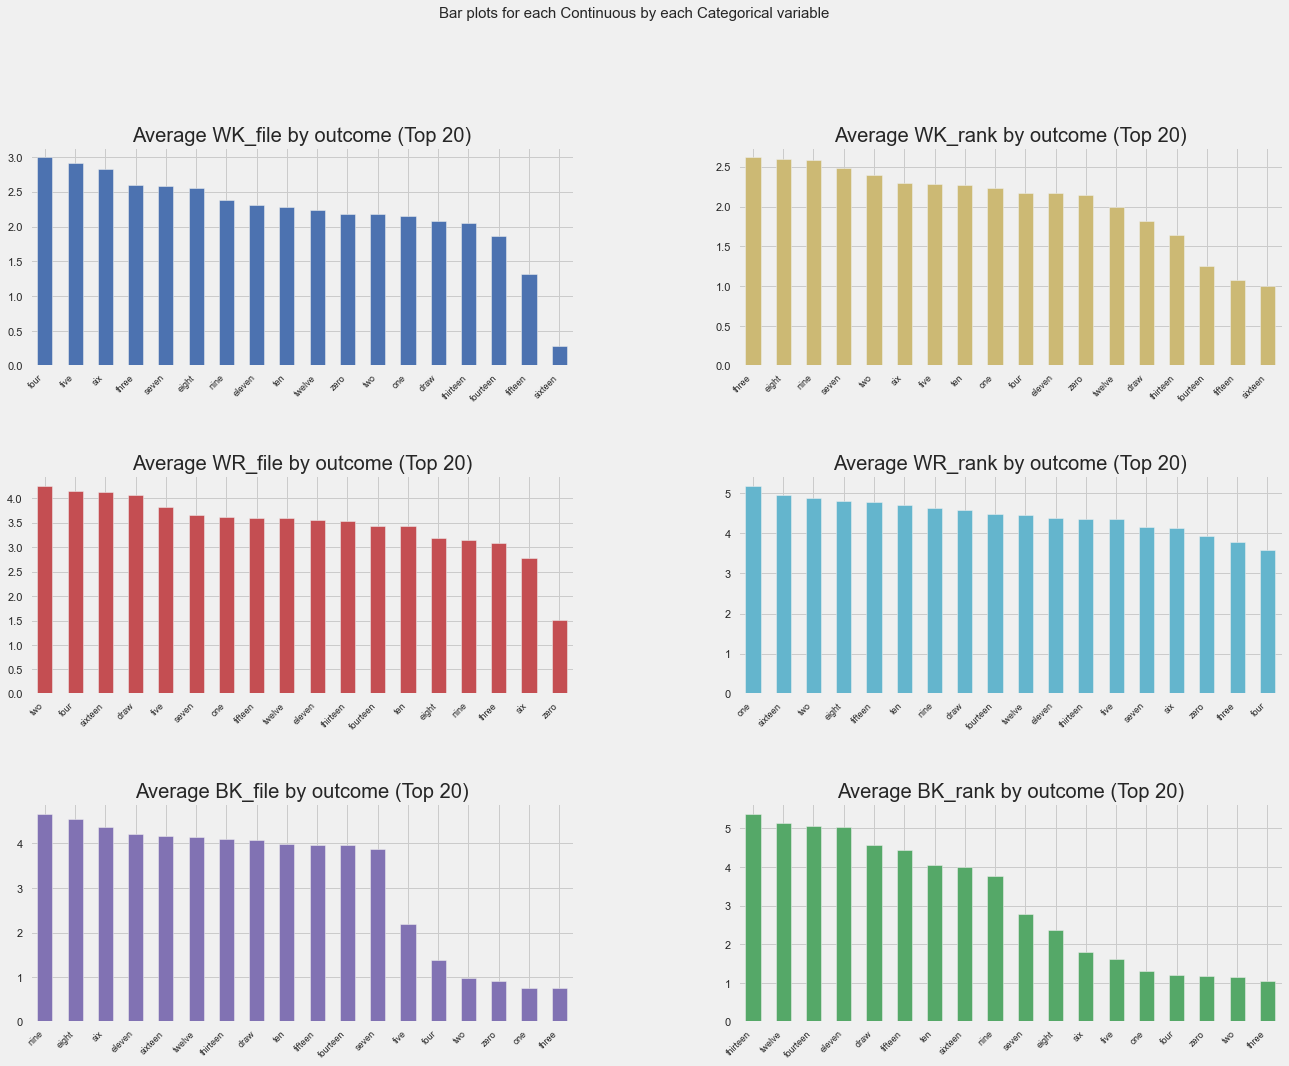

In [36]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep = sep,
    depVar = "",
    dfte = df,
    header = 0,
    verbose = 0,
    lowess = False,
    chart_format = "png"
)

In [19]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['WK_file', 'WR_file', 'BK_file']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head(5))

   WK_file  WK_rank  WR_file  WR_rank  BK_file  BK_rank outcome
0        0        1        2        1        2        2    draw
1        0        1        2        1        3        1    draw
2        0        1        2        1        3        2    draw
3        0        1        2        2        2        1    draw
4        0        1        2        2        2        3    draw


In [20]:
# train test split
from sklearn.model_selection import train_test_split

y = df['outcome']
X = df.drop(columns=['outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=99)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19638, 6)
(8417, 6)
(19638,)
(8417,)


In [25]:
# support vector machine
from sklearn import svm
from sklearn.metrics import accuracy_score

# model training and prediction
clf = svm.SVC()
clf.fit(X_train, y_train)
y_train_pred_clf = clf.predict(X_train)
y_test_pred_clf = clf.predict(X_test)

# accuracy scores
clf_train_accuracy = accuracy_score(y_train, y_train_pred_clf)
clf_test_accuracy = accuracy_score(y_test, y_test_pred_clf)
print("Training Accuracy:", clf_train_accuracy)
print("Test Accuracy:", clf_test_accuracy)

Training Accuracy: 0.5406355025970058
Test Accuracy: 0.5227515741950813


In [30]:
from sklearn.linear_model import LogisticRegression

# train and predict
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# accuracy scores
lr_train_accuracy = accuracy_score(y_train, y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print("Training Accuracy:", lr_train_accuracy)
print("Test Accuracy:", lr_test_accuracy)

Training Accuracy: 0.2798655667583257
Test Accuracy: 0.27634549126767255


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=99)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# accuracy scores
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print("Training Accuracy:", rf_train_accuracy)
print("Test Accuracy:", rf_test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8097897112985625


In [33]:
# SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(clf, param_grid=param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time=  23.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time=  23.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time=  23.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time=  23.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.162 total time=  23.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.439 total time=  12.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.442 total time=  12.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.449 total time=  12.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.460 total time=  12.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.452 total time=  12.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.328 total time=  14.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [35]:
# model training and prediction
new_clf = svm.SVC(C=10, gamma=1, kernel='rbf')
new_clf.fit(X_train, y_train)

y_train_pred_new = new_clf.predict(X_train)
y_test_pred_new = new_clf.predict(X_test)

train_accuracy_new = accuracy_score(y_train, y_train_pred_new)
test_accuracy_new = accuracy_score(y_test, y_test_pred_new)

print("Train Accuracy:", train_accuracy_new)
print("Test Accuracy:", test_accuracy_new)


Train Accuracy: 1.0
Test Accuracy: 0.8489960793631935
